Problem 1 (50 points)

Vapor-liquid equilibria data are correlated using two adjustable parameters $A_{12}$ and $A_{21}$ per binary mixture. For low pressures, the equilibrium relation can be formulated as:

$$
\begin{aligned}
p = x_1\exp\left(A_{12}\left(\frac{A_{21}x_2}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{water}^{sat}\\
 + x_2\exp\left(A_{21}\left(\frac{A_{12}x_1}{A_{12}x_1+A_{21}x_2}\right)^2\right)p_{1,4 dioxane}^{sat}.
\end{aligned}
$$
Here the saturation pressures are given by the Antoine equation

$$
\log_{10}(p^{sat}) = a_1 - \frac{a_2}{T + a_3},
$$
where $T = 20$($^{\circ}{\rm C}$) and $a_{1,2,3}$ for a water - 1,4 dioxane system is given below.

$a_1$	$a_2$	$a_3$
Water	8.07131	1730.63	233.426
1,4 dioxane	7.43155	1554.679	240.337
The following table lists the measured data. Recall that in a binary system $x_1 + x_2 = 1$.

$x_1$	0.0	0.1	0.2	0.3	0.4	0.5	0.6	0.7	0.8	0.9	1.0
$p$	28.1	34.4	36.7	36.9	36.8	36.7	36.5	35.4	32.9	27.7	17.5
Estimate $A_{12}$ and $A_{21}$ using data from the above table:

Formulate the least square problem;
Since the model is nonlinear, the problem does not have an analytical solution. Therefore, solve it using the gradient descent or Newton's method implemented in HW1;
Compare your optimized model with the data. Does your model fit well with the data?

Problem 2 (50 points)

Solve the following problem using Bayesian Optimization:$$
    \min_{x_1, x_2} \quad \left(4-2.1x_1^2 + \frac{x_1^4}{3}\right)x_1^2 + x_1x_2 + \left(-4 + 4x_2^2\right)x_2^2,
$$for $x_1 \in [-3,3]$ and $x_2 \in [-2,2]$. A tutorial on Bayesian Optimization can be found here.

Problem 1 - Part 1 (Formulation of Problem)

The least square problem can be fomulated as:

\begin{aligned}
\min_{A_{12}, A{21}} \text{loss}  = \sum \left(\hat{p}-p\right)^{2}
\end{aligned}

Here ^p is the given function in the question

In [13]:
#PROBLEM 1

import numpy as np
import torch as t
from torch.autograd import Variable

# Define a variable, make sure requires_grad=True so that PyTorch can take gradient with respect to this variable
A = Variable(t.tensor([2.0, 1.0]), requires_grad=True) #assuming initial values for A12 and A21 as 2 & 1.

#Value derived from given formulation for P and corresponding a values
p_Sat_Water = 17.4733
p_Sat_Dio = 28.8241

pData = t.tensor([28.1, 34.4, 36.7, 36.9, 36.8, 36.7, 36.5, 35.4, 32.9, 27.7, 17.5]) # Given P values
x1 = t.tensor([0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]) # Given corresponding X1 values
x2 = 1-x1 #Given relation between X1 and X2

# Fix the step size
a = 0.001

# Start gradient descent
for i in range(1000):  # TODO: change the termination criterion
    
    ObjFun = lambda A, x1, x2, p_Sat_Dio, p_Sat_Water: x1*t.exp(A[0]*(((A[1]*x2)/(A[0]*x1+A[1]*x2))**2))*p_Sat_Water + x2*t.exp(A[1]*(((A[0]*x1)/(A[0]*x1+A[1]*x2))**2))*p_Sat_Dio
    
    loss = t.sum((ObjFun(A,x1,x2,p_Sat_Dio,p_Sat_Water)-pData)**2) #Final Objective function for loss which is to be minimized
    loss.backward() #To take gradient
    
    # no_grad() specifies that the operations within this context are not part of the computational graph, i.e., we don't need the gradient descent algorithm itself to be differentiable with respect to x
    with t.no_grad():
        A -= a * A.grad
        
        # need to clear the gradient at every step, or otherwise it will accumulate...
        A.grad.zero_()

print('Values of both A = ',A.data.numpy())
print('Loss = ', loss.data.numpy())


A_final = ([1.9584166, 1.6891807])
final = ObjFun(A_final, x1, x2, p_Sat_Dio, p_Sat_Water)

print('Values of P computed using gradient descent')
print(final)
print('Original Values of P using experimental data')
print(pData)

Values of both A =  [1.9584166 1.6891807]
Loss =  0.67019147
Values of P computed using gradient descent
tensor([28.8241, 34.6443, 36.4530, 36.8673, 36.8740, 36.7498, 36.3904, 35.3848,
        32.9478, 27.7300, 17.4733])
Original Values of P using experimental data
tensor([28.1000, 34.4000, 36.7000, 36.9000, 36.8000, 36.7000, 36.5000, 35.4000,
        32.9000, 27.7000, 17.5000])


Problem 1 - Part 3

To compare the two values, we shall now plot both the Pressures's, from experimental data and from the gradient descent algorithm 

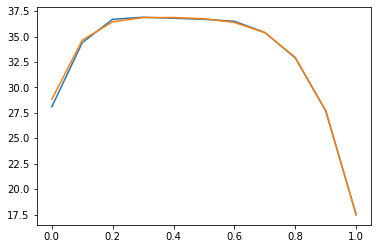

In [15]:
import matplotlib.pyplot as plt
plt.plot(x1, pData)
plt.plot(x1, final)